<a href="https://colab.research.google.com/github/Sanvideep/IPL-score-prediction/blob/main/IPL_Score_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
# Importing essential libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Loading the dataset
df = pd.read_csv('ipl.csv')

# **Exploring the dataset**

In [6]:
df.columns

Index(['mid', 'date', 'venue', 'bat_team', 'bowl_team', 'batsman', 'bowler',
       'runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5', 'striker',
       'non-striker', 'total'],
      dtype='object')

In [7]:
df.shape

(8664, 15)

In [8]:
df.head()

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,1.0,0.0,0.1,1.0,0.0,0.0,0.0,222.0
1,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,1.0,0.0,0.2,1.0,0.0,0.0,0.0,222.0
2,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2.0,0.0,0.2,2.0,0.0,0.0,0.0,222.0
3,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2.0,0.0,0.3,2.0,0.0,0.0,0.0,222.0
4,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2.0,0.0,0.4,2.0,0.0,0.0,0.0,222.0


In [9]:
df.dtypes

,0
mid,int64
date,object
venue,object
bat_team,object
bowl_team,object
batsman,object
bowler,object
runs,float64
wickets,float64
overs,float64


# **Data Cleaning**

Points covered under this section:

*• Removing unwanted columns*

*• Keeping only consistent teams*

*• Removing the first 5 overs data in every match*

*• Converting the column 'date' from string into datetime object*

In [10]:
#Removing unwanted columns
columns_to_remove = ['mid', 'venue', 'batsman', 'bowler', 'striker', 'non-striker']
df.drop(labels=columns_to_remove, axis=1, inplace=True)

In [11]:
df.columns

Index(['date', 'bat_team', 'bowl_team', 'runs', 'wickets', 'overs',
       'runs_last_5', 'wickets_last_5', 'total'],
      dtype='object')

In [12]:
df.shape

(8664, 9)

In [13]:
df.head()

,date,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
0,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,1.0,0.0,0.1,1.0,0.0,222.0
1,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,1.0,0.0,0.2,1.0,0.0,222.0
2,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,2.0,0.0,0.2,2.0,0.0,222.0
3,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,2.0,0.0,0.3,2.0,0.0,222.0
4,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,2.0,0.0,0.4,2.0,0.0,222.0


In [14]:
df['bat_team'].unique()

array(['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
       'Mumbai Indians', 'Deccan Chargers', 'Kings XI Punjab',
       'Royal Challengers Bangalore', 'Delhi Daredevils'], dtype=object)

In [15]:
df['bowl_team'].unique()

array(['Royal Challengers Bangalore', 'Kings XI Punjab',
       'Delhi Daredevils', 'Kolkata Knight Riders', 'Rajasthan Royals',
       'Mumbai Indians', 'Chennai Super Kings', 'Deccan Chargers'],
      dtype=object)

In [16]:
consistent_teams = ['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
                    'Mumbai Indians', 'Kings XI Punjab', 'Royal Challengers Bangalore',
                    'Delhi Daredevils', 'Sunrisers Hyderabad']

In [17]:
# Keeping only the consistent teams
print('Before removing inconsistent teams: {}'.format(df.shape))
df = df[(df['bat_team'].isin(consistent_teams)) & (df['bowl_team'].isin(consistent_teams))]
print('After removing inconsistent teams: {}'.format(df.shape))

Before removing inconsistent teams: (8664, 9)
After removing inconsistent teams: (6441, 9)


In [18]:
df['bat_team'].unique()

array(['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
       'Mumbai Indians', 'Kings XI Punjab', 'Royal Challengers Bangalore',
       'Delhi Daredevils'], dtype=object)

In [19]:
#Removing first 5 overs data in every match due to inconsistent data in first 5 over
print('Before removing first 5 overs data: {}'.format(df.shape))
df = df[df['overs']>=5.0]
print('After removing first 5 overs data: {}'.format(df.shape))

Before removing first 5 overs data: (6441, 9)
After removing first 5 overs data: (4775, 9)


In [20]:
# Converting the column 'date' from string into datetime object
from datetime import datetime
df['date'] = df['date'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d'))
print(df['date'].dtype)

datetime64[ns]


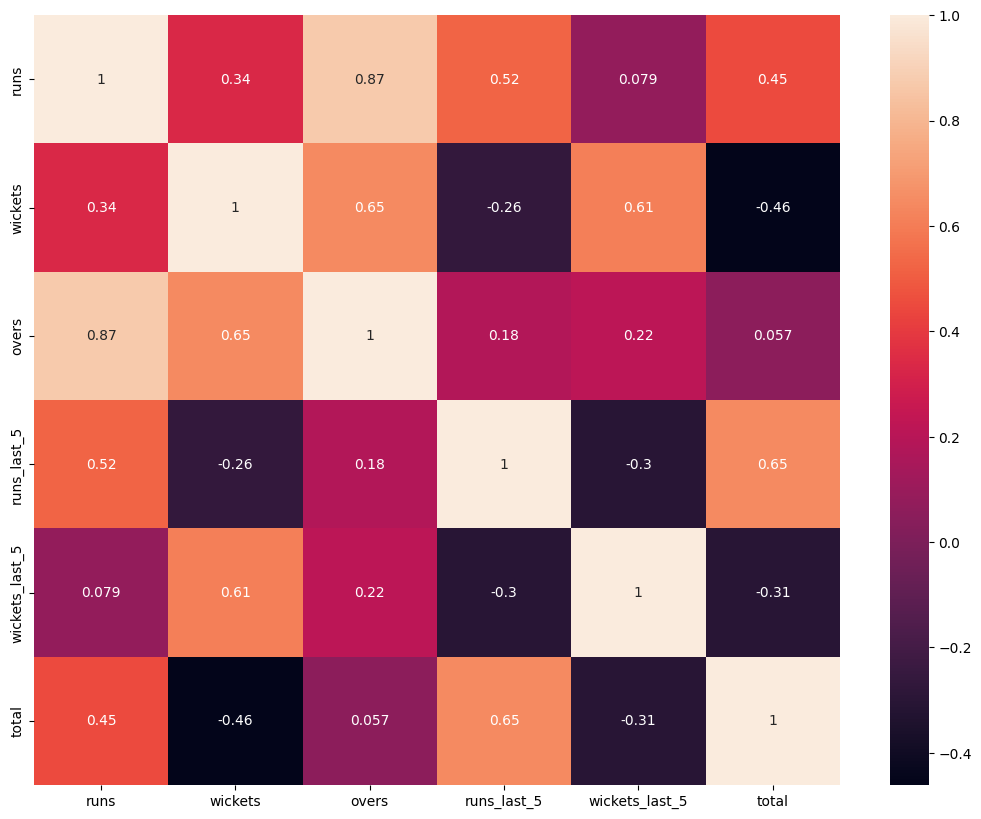

In [21]:
# Get correlation of all the features of the dataset
corr_matrix = df.corr(numeric_only=True)
top_corr_features = corr_matrix.index

# Plotting the heatmap
plt.figure(figsize=(13,10))
g = sns.heatmap(data=df[top_corr_features].corr(), annot=True, color='blue')

# **Data Preprocessing**
*• Handling categorical features*

*• Splitting dataset into train and test set on the basis of date*

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4775 entries, 32 to 8662
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   date            4775 non-null   datetime64[ns]
 1   bat_team        4775 non-null   object        
 2   bowl_team       4775 non-null   object        
 3   runs            4775 non-null   float64       
 4   wickets         4775 non-null   float64       
 5   overs           4775 non-null   float64       
 6   runs_last_5     4775 non-null   float64       
 7   wickets_last_5  4775 non-null   float64       
 8   total           4775 non-null   float64       
dtypes: datetime64[ns](1), float64(6), object(2)
memory usage: 373.0+ KB


In [23]:
# One Hot Encoding- to convert the categorical value to numerical
encoded_df=pd.get_dummies(data=df, columns=['bat_team', 'bowl_team'])
bool_cols = encoded_df.select_dtypes(include='bool').columns
encoded_df[bool_cols] = encoded_df[bool_cols].astype(int)

In [24]:
encoded_df.head()

,date,runs,wickets,overs,runs_last_5,wickets_last_5,total,bat_team_Chennai Super Kings,bat_team_Delhi Daredevils,bat_team_Kings XI Punjab,...,bat_team_Mumbai Indians,bat_team_Rajasthan Royals,bat_team_Royal Challengers Bangalore,bowl_team_Chennai Super Kings,bowl_team_Delhi Daredevils,bowl_team_Kings XI Punjab,bowl_team_Kolkata Knight Riders,bowl_team_Mumbai Indians,bowl_team_Rajasthan Royals,bowl_team_Royal Challengers Bangalore
32,2008-04-18,61.0,0.0,5.1,59.0,0.0,222.0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
33,2008-04-18,61.0,1.0,5.2,59.0,1.0,222.0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
34,2008-04-18,61.0,1.0,5.3,59.0,1.0,222.0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
35,2008-04-18,61.0,1.0,5.4,59.0,1.0,222.0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
36,2008-04-18,61.0,1.0,5.5,58.0,1.0,222.0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [27]:
# Rearranging the columns
encoded_df = encoded_df[['date', 'bat_team_Chennai Super Kings', 'bat_team_Delhi Daredevils', 'bat_team_Kings XI Punjab',
              'bat_team_Kolkata Knight Riders', 'bat_team_Mumbai Indians', 'bat_team_Rajasthan Royals',
              'bat_team_Royal Challengers Bangalore',
              'bowl_team_Chennai Super Kings', 'bowl_team_Delhi Daredevils', 'bowl_team_Kings XI Punjab',
              'bowl_team_Kolkata Knight Riders', 'bowl_team_Mumbai Indians', 'bowl_team_Rajasthan Royals',
              'bowl_team_Royal Challengers Bangalore',
              'overs', 'runs', 'wickets', 'runs_last_5', 'wickets_last_5', 'total']]

In [52]:
from pandas._libs.tslibs.offsets import YearBegin
# Splitting the data into train and test set
X_train = encoded_df.drop(labels='total', axis=1)[encoded_df['date'].dt.year <= 2008]
X_test = encoded_df.drop(labels='total', axis=1)[encoded_df['date'].dt.year >= 2009]

Y_train = encoded_df[encoded_df['date'].dt.year <= 2008]['total'].values
Y_test = encoded_df[encoded_df['date'].dt.year >= 2009]['total'].values

# Removing the 'date' column
X_train.drop(labels='date', axis=True, inplace=True)
X_test.drop(labels='date', axis=True, inplace=True)

print("Training set: {} and Test set: {}".format(X_train.shape, X_test.shape))

Training set: (3814, 19) and Test set: (961, 19)


# **MODEL BUILDING**

In [37]:
print(f"Maximum year in the dataset: {encoded_df['date'].dt.year.max()}")

Maximum year in the dataset: 2009


In [38]:
# Linear Regression Model
from sklearn.linear_model import LinearRegression
linear_regressor = LinearRegression()
linear_regressor.fit(X_train,Y_train)

LinearRegression()

In [39]:
# Predicting results
y_pred_lr=linear_regressor.predict(X_test)

In [40]:
# Linear Regression - Model Evaluation
from sklearn.metrics import mean_absolute_error as mae, mean_squared_error as mse, accuracy_score
print("Mean Absolute Error (MAE): {}".format(mae(Y_test, y_pred_lr)))
print("Mean Squared Error (MSE): {}".format(mse(Y_test, y_pred_lr)))
print("Root Mean Squared Error (RMSE): {}".format(np.sqrt(mse(Y_test, y_pred_lr))))

Mean Absolute Error (MAE): 10.72536011883232
Mean Squared Error (MSE): 194.9036003214309
Root Mean Squared Error (RMSE): 13.960787954891046


Decision Tree

In [41]:
from sklearn.tree import DecisionTreeRegressor
decision_regressor = DecisionTreeRegressor()
decision_regressor.fit(X_train,Y_train)

DecisionTreeRegressor()

In [42]:
y_pred_dt= decision_regressor.predict(X_test)

In [43]:
print("Mean Absolute Error (MAE): {}".format(mae(Y_test, y_pred_dt)))
print("Mean Squared Error (MSE): {}".format(mse(Y_test, y_pred_dt)))
print("Root Mean Squared Error (RMSE): {}".format(np.sqrt(mse(Y_test, y_pred_dt))))

Mean Absolute Error (MAE): 15.816857440166494
Mean Squared Error (MSE): 401.14047866805413
Root Mean Squared Error (RMSE): 20.02849167231657


Random Forest

In [44]:
from sklearn.ensemble import RandomForestRegressor

In [45]:
random_regressor = RandomForestRegressor()
random_regressor.fit(X_train,Y_train)
y_pred_rf= random_regressor.predict(X_test)

Out of all the models the best results have been given by Linear Regression, so we will use it in AdaBoost

AdaBoost Algorithm

In [46]:
# AdaBoost Model using Linear Regression as the base learner
from sklearn.ensemble import AdaBoostRegressor
adb_regressor = AdaBoostRegressor(estimator=linear_regressor, n_estimators=100)
adb_regressor.fit(X_train, Y_train)

AdaBoostRegressor(estimator=LinearRegression(), n_estimators=100)

In [47]:
y_pred_adb=adb_regressor.predict(X_test)

In [48]:
print("Mean Absolute Error (MAE): {}".format(mae(Y_test, y_pred_adb)))
print("Mean Squared Error (MSE): {}".format(mse(Y_test, y_pred_adb)))
print("Root Mean Squared Error (RMSE): {}".format(np.sqrt(mse(Y_test, y_pred_adb))))

Mean Absolute Error (MAE): 11.57714588299291
Mean Squared Error (MSE): 236.34555125757092
Root Mean Squared Error (RMSE): 15.373534117358016


# **PREDICTIONS**
• Model trained on the data from IPL **Seasons 1 to 9 ie: (2008 to 2016)**

• Model tested on data from IPL **Season 10 ie: (2017)**

• Model predicts on data from **IPL Seasons 11 to 12 ie: (2018 to 2019)**

In [53]:
def predict_score(batting_team='Chennai Super Kings', bowling_team='Mumbai Indians', overs=5.1, runs=50, wickets=0, runs_in_prev_5=50, wickets_in_prev_5=0):
  temp_array = list()

  # Batting Team (7 teams)
  if batting_team == 'Chennai Super Kings':
    temp_array = temp_array + [1,0,0,0,0,0,0]
  elif batting_team == 'Delhi Daredevils':
    temp_array = temp_array + [0,1,0,0,0,0,0]
  elif batting_team == 'Kings XI Punjab':
    temp_array = temp_array + [0,0,1,0,0,0,0]
  elif batting_team == 'Kolkata Knight Riders':
    temp_array = temp_array + [0,0,0,1,0,0,0]
  elif batting_team == 'Mumbai Indians':
    temp_array = temp_array + [0,0,0,0,1,0,0]
  elif batting_team == 'Rajasthan Royals':
    temp_array = temp_array + [0,0,0,0,0,1,0]
  elif batting_team == 'Royal Challengers Bangalore':
    temp_array = temp_array + [0,0,0,0,0,0,1]

  # Bowling Team (7 teams)
  if bowling_team == 'Chennai Super Kings':
    temp_array = temp_array + [1,0,0,0,0,0,0]
  elif bowling_team == 'Delhi Daredevils':
    temp_array = temp_array + [0,1,0,0,0,0,0]
  elif bowling_team == 'Kings XI Punjab':
    temp_array = temp_array + [0,0,1,0,0,0,0]
  elif bowling_team == 'Kolkata Knight Riders':
    temp_array = temp_array + [0,0,0,1,0,0,0]
  elif bowling_team == 'Mumbai Indians':
    temp_array = temp_array + [0,0,0,0,1,0,0]
  elif bowling_team == 'Rajasthan Royals':
    temp_array = temp_array + [0,0,0,0,0,1,0]
  elif bowling_team == 'Royal Challengers Bangalore':
    temp_array = temp_array + [0,0,0,0,0,0,1]

  # Overs, Runs, Wickets, Runs_in_prev_5, Wickets_in_prev_5
  temp_array = temp_array + [overs, runs, wickets, runs_in_prev_5, wickets_in_prev_5]

  # Converting into numpy array
  temp_array = np.array([temp_array])

  # Prediction
  return int(linear_regressor.predict(temp_array)[0])

# **Prediction 1**

• Date: 16th April 2018

• IPL : Season 11

• Match number: 13

• Teams: Kolkata Knight Riders vs. Delhi Daredevils

• First Innings final score: 200/9

In [54]:
final_score = predict_score(batting_team='Kolkata Knight Riders', bowling_team='Delhi Daredevils', overs=9.2, runs=79, wickets=2, runs_in_prev_5=60, wickets_in_prev_5=1)
print("The final predicted score (range): {} to {}".format(final_score-10, final_score+5))

The final predicted score (range): 158 to 173


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


# **PREDICTION 2**

• Date: 17th May 2018

• IPL : Season 11

• Match number: 50

• Teams: Mumbai Indians vs. Kings XI Punjab

• First Innings final score: 186/8

In [60]:
final_score = predict_score(batting_team='Mumbai Indians', bowling_team='Kings XI Punjab', overs=14.1, runs=136, wickets=4, runs_in_prev_5=50, wickets_in_prev_5=0)
print("The final predicted score (range): {} to {}".format(final_score-10, final_score+5))

The final predicted score (range): 180 to 195


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


# **PREDICTION 3**

• Date: 30th March 2019

• IPL : Season 12

• Match number: 9

• Teams: Mumbai Indians vs. Kings XI Punjab

• First Innings final score: 176/7

In [61]:
final_score = predict_score(batting_team='Mumbai Indians', bowling_team='Kings XI Punjab', overs=12.3, runs=113, wickets=2, runs_in_prev_5=55, wickets_in_prev_5=0)
print("The final predicted score (range): {} to {}".format(final_score-10, final_score+5))

The final predicted score (range): 182 to 197


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


# **PREDICTION 4**

• Date: 11th April 2019

• IPL : Season 12

• Match number: 25

• Teams: Rajasthan Royals vs. Chennai Super Kings

• First Innings final score: 151/7

In [63]:
final_score = predict_score(batting_team='Rajasthan Royals', bowling_team='Chennai Super Kings', overs=13.3, runs=92, wickets=5, runs_in_prev_5=27, wickets_in_prev_5=2)
print("The final predicted score (range): {} to {}".format(final_score-10, final_score+5))

The final predicted score (range): 130 to 145


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
